In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
file= r'C:\Users\sivap\OneDrive\Documents\Projects\Spam Project\Spam Data\spam.csv'

In [3]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [4]:
df = pd.read_csv(file, encoding = 'Windows-1252')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.shape

(5572, 5)

In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

- We see majority of the data in Unnamed: 2	Unnamed: 3	Unnamed: 4 are null values hence dropping the columns

In [8]:
df= df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [9]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

- We have an imbalanced dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
#creating a new column to give us the length of the text in column v2
df['length']= df.v2.str.len()

In [12]:
df

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [13]:
df['v1'].replace({'ham':0,'spam':1},inplace=True)

- Encoding ham mails as '0' and spam as '1'

In [14]:
df

,v1,v2,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


# TEXT PRE-PROCESSING/ DATA CLEANING

- Following steps which we call Natural Language Processing is used to clean the text data and titles. 
- A function was written which decontracted certain words. Numbers, punctuations, spaces, were removed.
- Stopwords were removed and the sentences were converted to lower case. Words were converted to their base root mode using lemmatization.

In [15]:
#writing a function that will hel decontract words. for example 're will be converted to are.
import re
def decontracted(phrase):
    phrase = re.sub(r"’","'",str(phrase))
    phrase = re.sub(r"”",'"',str(phrase))
    phrase = re.sub(r"“",'"',str(phrase))
    phrase = re.sub(r"won't","will not",str(phrase))
    phrase = re.sub(r"can\'t","can not",str(phrase))
    phrase = re.sub(r"n\'t"," not",str(phrase))
    phrase = re.sub(r"\'re"," are",str(phrase))
    phrase = re.sub(r"don't","do not",str(phrase))
    phrase = re.sub(r"\'s","s",str(phrase))
    phrase = re.sub(r"\'ll"," will",str(phrase))
    phrase = re.sub(r"\'d"," would",str(phrase))
    phrase = re.sub(r"\'t"," not",str(phrase))
    phrase = re.sub(r"\'ve"," have",str(phrase))
    phrase = re.sub(r"\'m"," am",str(phrase))
    return str(phrase)


In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [17]:
l = WordNetLemmatizer()
stop_words = set(stopwords.words('english')+ ['u','im','ur', 'going','ok','will'])

In [18]:
message = []
for sentence in df['v2'].values:
    sent = decontracted(sentence)
    sent = re.sub(r'https?:\/\/.*[\r\n]*','',sent)
    sent = re.sub('[^A-Za-z]', ' ',sent)
    sent = sent.split()
    
    sent = [l.lemmatize(word) for word in sent if word.lower() not in stop_words]
    sent =' '.join(sent)
    message.append(sent.lower().strip())

In [19]:
df['v2']= message

In [20]:
df

,v1,v2,length
0,0,go jurong point crazy available bugis n great ...,111
1,0,lar joking wif oni,29
2,1,free entry wkly comp win fa cup final tkts st ...,155
3,0,dun say early hor c already say,49
4,0,nah think go usf life around though,61
...,...,...,...
5567,1,nd time tried contact pound prize claim easy c...,161
5568,0,b esplanade fr home,37
5569,0,pity mood suggestion,57
5570,0,guy bitching acted like would interested buyin...,125


In [21]:
df['clean_length'] = df['v2'].str.len()

In [22]:
df

,v1,v2,length,clean_length
0,0,go jurong point crazy available bugis n great ...,111,82
1,0,lar joking wif oni,29,18
2,1,free entry wkly comp win fa cup final tkts st ...,155,102
3,0,dun say early hor c already say,49,31
4,0,nah think go usf life around though,61,35
...,...,...,...,...
5567,1,nd time tried contact pound prize claim easy c...,161,79
5568,0,b esplanade fr home,37,19
5569,0,pity mood suggestion,57,20
5570,0,guy bitching acted like would interested buyin...,125,84


In [23]:
print('Junk data Length',df['length'].sum())
print('Clean length',df['clean_length'].sum())

Junk data Length 446422
Clean length 268489


- Here we can see how much the data has been cleaned as the length of the sentences has been reduced

In [24]:
from wordcloud import WordCloud
wc = WordCloud(background_color = 'white',collocations=False, colormap = 'Dark2', max_font_size = 150, random_state =42, max_words= 30)

In [25]:
spam = df['v2'][df['v1']==1]

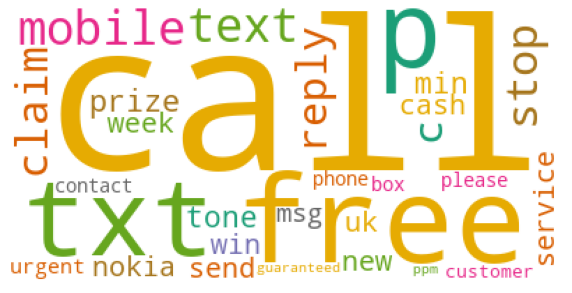

In [26]:
import matplotlib.pyplot as plt
 
spam_cloud = wc.generate(' '.join(spam))
    
plt.figure(figsize =(10,6))
plt.imshow(spam_cloud)
plt.axis('off')
plt.show()

- we mostly have call, free, txt, claim, prize etc that indicates a mail to be spam. These words are unusual for a normal mail.

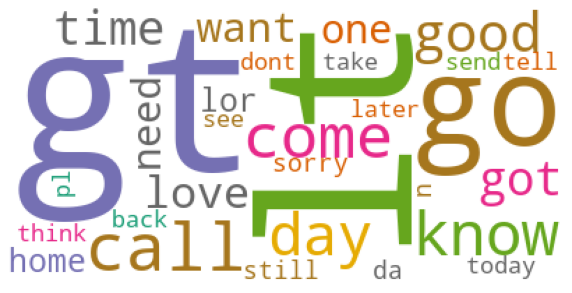

In [27]:
import matplotlib.pyplot as plt

ham = df["v2"][df['v1']==0]
 
ham_cloud = wc.generate(' '.join(df["v2"][df['v1']==0]))
    
plt.figure(figsize =(10,6))
plt.imshow(ham_cloud)
plt.axis('off')
plt.show()

- We mostly see normal day to day words used in the case of ham mails.

# CONVERTING TEXT DATA TO NUMERICAL DATA

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf = TfidfVectorizer() 
data_cv = tfidf.fit_transform(df.v2)
data = pd.DataFrame(data_cv.toarray(), columns =tfidf.get_feature_names_out())



# MODEL BUILDING

In [29]:
X= data
y= df['v1']

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB



In [32]:
MaxR2 = 0
MaxRS =0
for i in range(1,20):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(X_train,y_train)
    prerf= rf.predict(X_test)
    acc= accuracy_score(y_test,prerf)
    print('accuracy',acc,'random_state',1)
    
    if acc>MaxR2:
        MaxR2=acc
        MaxRS= i
print('Best accuracy score is', MaxR2,'at random state', MaxRS)

accuracy 0.9838565022421525 random_state 1
accuracy 0.9659192825112107 random_state 1
accuracy 0.9757847533632287 random_state 1
accuracy 0.968609865470852 random_state 1
accuracy 0.9766816143497757 random_state 1
accuracy 0.9748878923766816 random_state 1
accuracy 0.9802690582959641 random_state 1
accuracy 0.9820627802690582 random_state 1
accuracy 0.9829596412556054 random_state 1
accuracy 0.9748878923766816 random_state 1
accuracy 0.9883408071748879 random_state 1
accuracy 0.9668161434977578 random_state 1
accuracy 0.9775784753363229 random_state 1


KeyboardInterrupt: 

In [33]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state =1)

In [34]:
nb = GaussianNB()

In [38]:
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
print('Score', accuracy_score(y_test,nbpred))
print(confusion_matrix(y_test,nbpred))
print(classification_report(y_test,nbpred))

cv = cross_val_score(nb,X,y,cv=10)
print('Cross Validation Score: \n', cv.mean())
print('Difference in cross val score\n', accuracy_score(y_test,nbpred)- abs(cv.mean()))
print('**'*50)


Score 0.8851399856424982
[[1072  141]
 [  19  161]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1213
           1       0.53      0.89      0.67       180

    accuracy                           0.89      1393
   macro avg       0.76      0.89      0.80      1393
weighted avg       0.92      0.89      0.90      1393

Cross Validation Score: 
 0.8799324980856225
Difference in cross val score
 0.005207487556875723
****************************************************************************************************


In [39]:
naive = MultinomialNB()

In [41]:
naive.fit(X_train,y_train)
npred = naive.predict(X_test)
print('Score', accuracy_score(y_test,npred))
print(confusion_matrix(y_test,npred))
print(classification_report(y_test,npred))

cv = cross_val_score(naive,X,y,cv=10)
print('Cross Validation Score: \n', cv.mean())
print('Difference in cross val score\n', accuracy_score(y_test,npred)- abs(cv.mean()))
print('**'*50)


Score 0.9720028715003589
[[1213    0]
 [  39  141]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1213
           1       1.00      0.78      0.88       180

    accuracy                           0.97      1393
   macro avg       0.98      0.89      0.93      1393
weighted avg       0.97      0.97      0.97      1393

Cross Validation Score: 
 0.9689494411304802
Difference in cross val score
 0.003053430369878707
****************************************************************************************************


In [42]:
ada= AdaBoostClassifier()
ada.fit(X_train,y_train)
adapred = ada.predict(X_test)
print('Score', accuracy_score(y_test,adapred))
print(confusion_matrix(y_test,adapred))
print(classification_report(y_test,adapred))

cv = cross_val_score(ada,X,y,cv=10)
print('Cross Validation Score: \n', cv.mean())
print('Difference in cross val score\n', accuracy_score(y_test,adapred)- abs(cv.mean()))
print('**'*50)


Score 0.9741564967695621
[[1199   14]
 [  22  158]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1213
           1       0.92      0.88      0.90       180

    accuracy                           0.97      1393
   macro avg       0.95      0.93      0.94      1393
weighted avg       0.97      0.97      0.97      1393

Cross Validation Score: 
 0.9687728036138298
Difference in cross val score
 0.005383693155732283
****************************************************************************************************


In [43]:
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
rfpred = rf.predict(X_test)
print('Score', accuracy_score(y_test,rfpred))
print(confusion_matrix(y_test,rfpred))
print(classification_report(y_test,rfpred))

cv = cross_val_score(rf,X,y,cv=10)
print('Cross Validation Score: \n', cv.mean())
print('Difference in cross val score\n', accuracy_score(y_test,rfpred)- abs(cv.mean()))
print('**'*50)

Score 0.9820531227566404
[[1213    0]
 [  25  155]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1213
           1       1.00      0.86      0.93       180

    accuracy                           0.98      1393
   macro avg       0.99      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



KeyboardInterrupt: 

In [44]:
gb= GradientBoostingClassifier()
gb.fit(X_train,y_train)
gbpred = gb.predict(X_test)
print('Score', accuracy_score(y_test,gbpred))
print(confusion_matrix(y_test,gbpred))
print(classification_report(y_test,gbpred))
 
cv = cross_val_score(gb,X,y,cv=10)
print('Cross Validation Score: \n', cv.mean())
print('Difference in cross val score\n', accuracy_score(y_test,gbpred)- abs(cv.mean()))
print('**'*50)



KeyboardInterrupt: 

# ROC-AUC CURVE

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report


NameError: name 'plot_roc_curve' is not defined

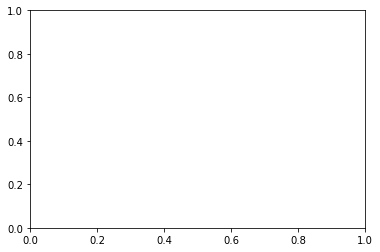

In [47]:
classifiers = [rf, nb, naive, ada, gb]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

# Conclusion

RandomForestClassifier is selected as the best model as it showed better performance in all aspects. This decision was taken on the basis of other metrics too. As we can see it is giving as 0 mails that are falsely predicted as ham mails when infact they are spam. This is very essential to this business model as we don't want to click into spams and cause damanges to the system, which may again have further implication depending on the industry.

# SAVING BEST MODEL

In [49]:
import joblib

In [51]:
joblib.dump(naive,"EmailClassification")

['EmailClassification']